In [1]:
import pandas as pd

### 시각화 라이브러리 정의

# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt


# - 히트맵 라이브러리
import seaborn as sns



# - 한글처리 
plt.rc("font",family = "Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

import numpy as np

In [2]:
# CSV 파일 불러오기
df = pd.read_csv("부산환경공단 일별 방류수 수질정보.csv")

In [3]:
# 각 열별 결측치 개수 확인
missing_counts = df.isnull().sum()
missing_counts

사업단           0
날짜            0
하수처리량(㎥/일)    0
bod           0
toc           0
ss            0
tn            0
tp            0
월             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사업단         14610 non-null  object 
 1   날짜          14610 non-null  object 
 2   하수처리량(㎥/일)  14610 non-null  int64  
 3   bod         14610 non-null  float64
 4   toc         14610 non-null  float64
 5   ss          14610 non-null  float64
 6   tn          14610 non-null  float64
 7   tp          14610 non-null  float64
 8   월           14610 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.0+ MB


In [5]:
print("✅ 결측치 없음" if df.isnull().sum().sum() == 0 else "⚠️ 결측치 존재함!")

✅ 결측치 없음


In [6]:
df.dtypes

사업단            object
날짜             object
하수처리량(㎥/일)      int64
bod           float64
toc           float64
ss            float64
tn            float64
tp            float64
월               int64
dtype: object

In [7]:
# 날짜 문자열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

In [8]:
df.dtypes

사업단                   object
날짜            datetime64[ns]
하수처리량(㎥/일)             int64
bod                  float64
toc                  float64
ss                   float64
tn                   float64
tp                   float64
월                      int64
dtype: object

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

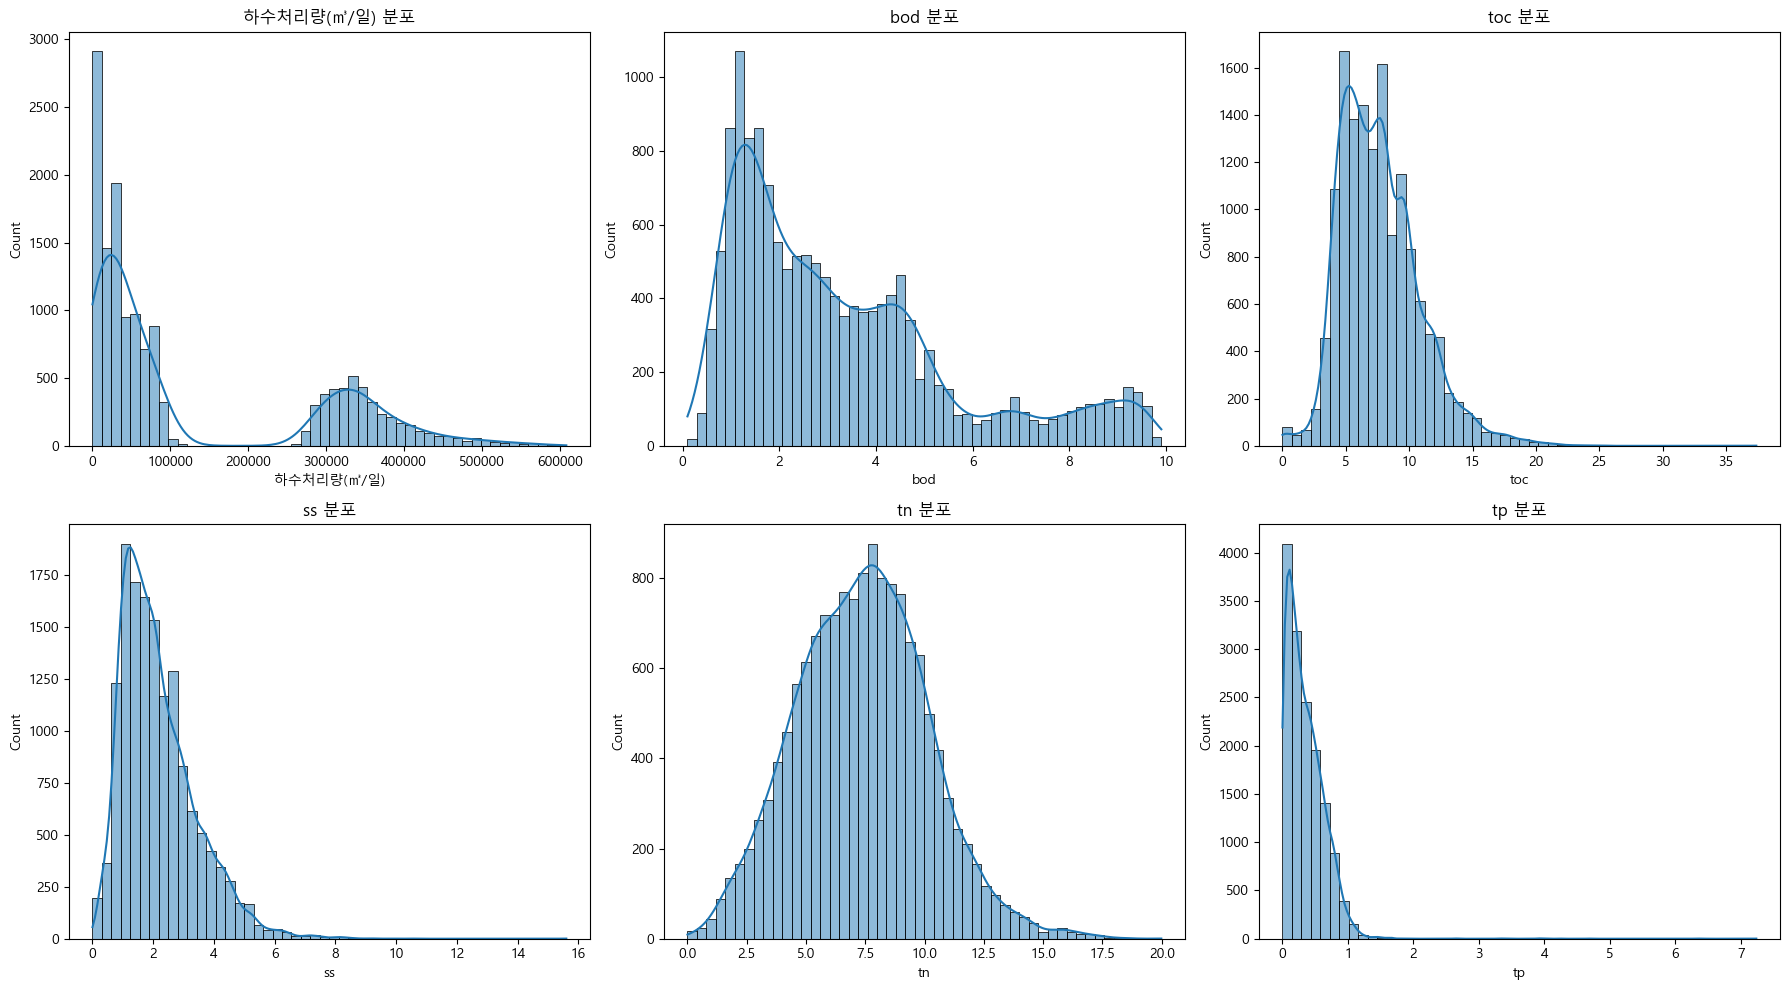

In [10]:
# 각 항목 분포 확인 (전체)
cols = ['하수처리량(㎥/일)', 'bod', 'toc', 'ss', 'tn', 'tp']

plt.figure(figsize=(18, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'{col} 분포')
plt.tight_layout()
plt.show()

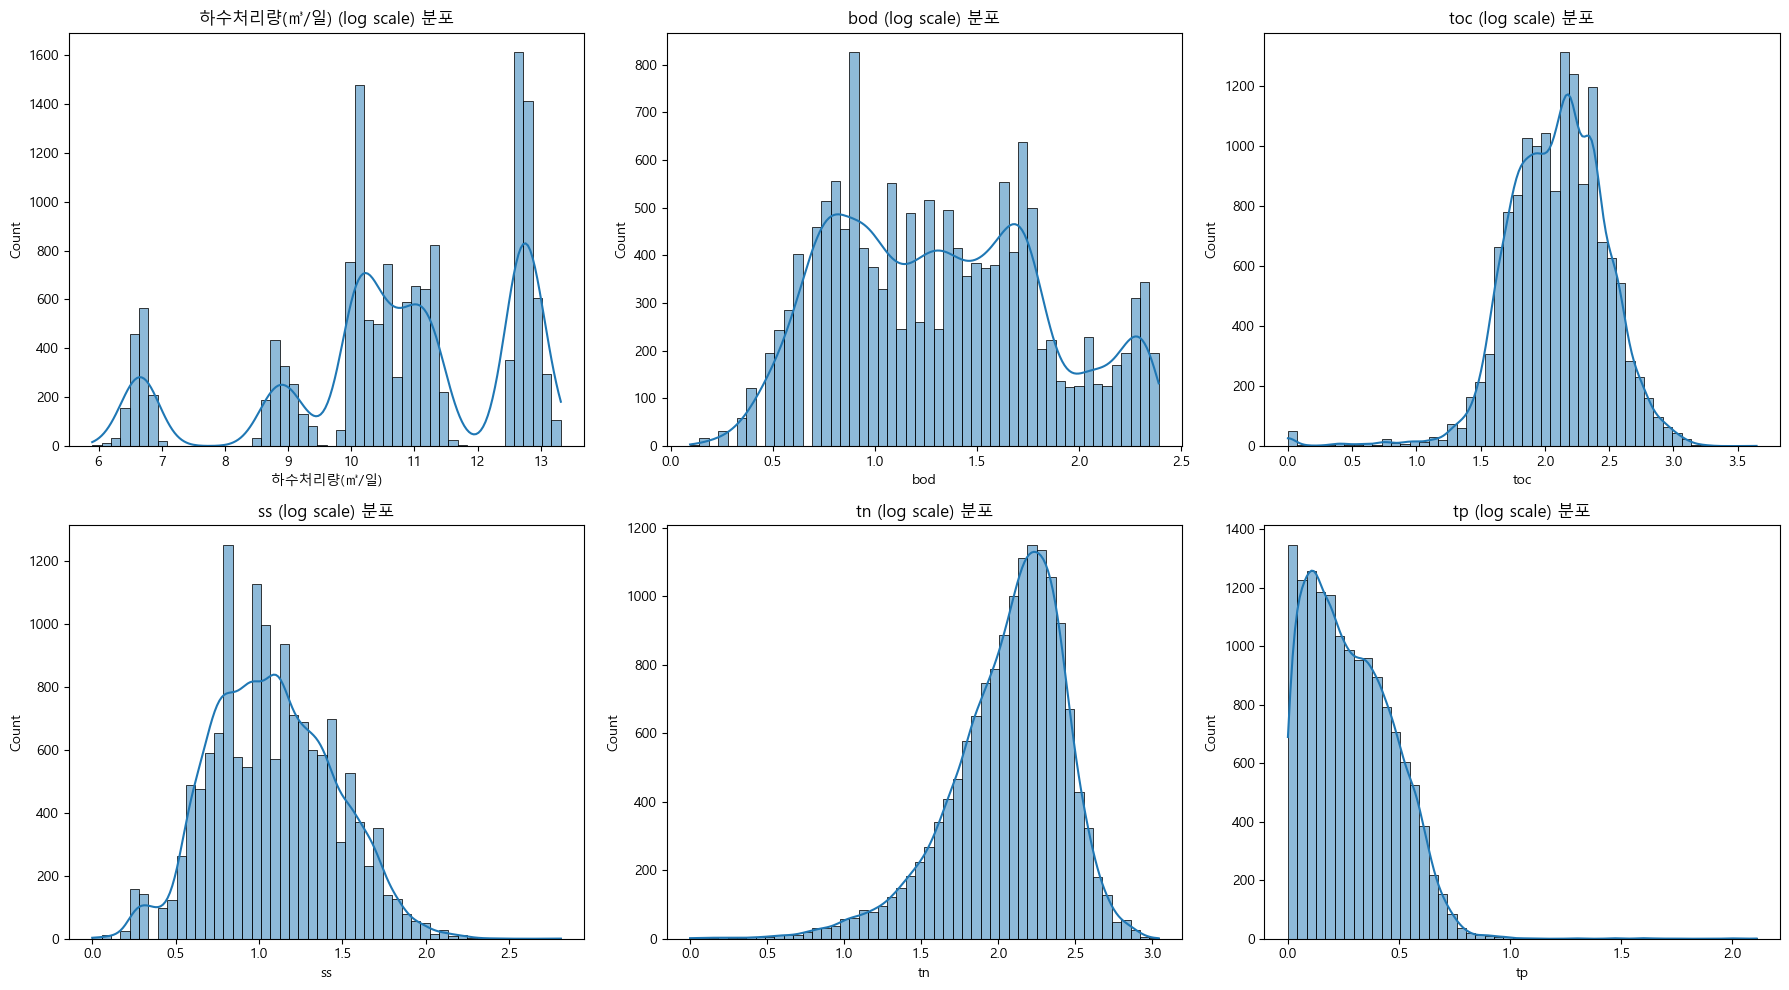

In [11]:
# 로그 스케일로 분포 확인(왜곡 확인) - 굳이 안해도 될 듯
plt.figure(figsize=(18, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(np.log1p(df[col]), kde=True, bins=50)
    plt.title(f'{col} (log scale) 분포')
plt.tight_layout()
plt.show()

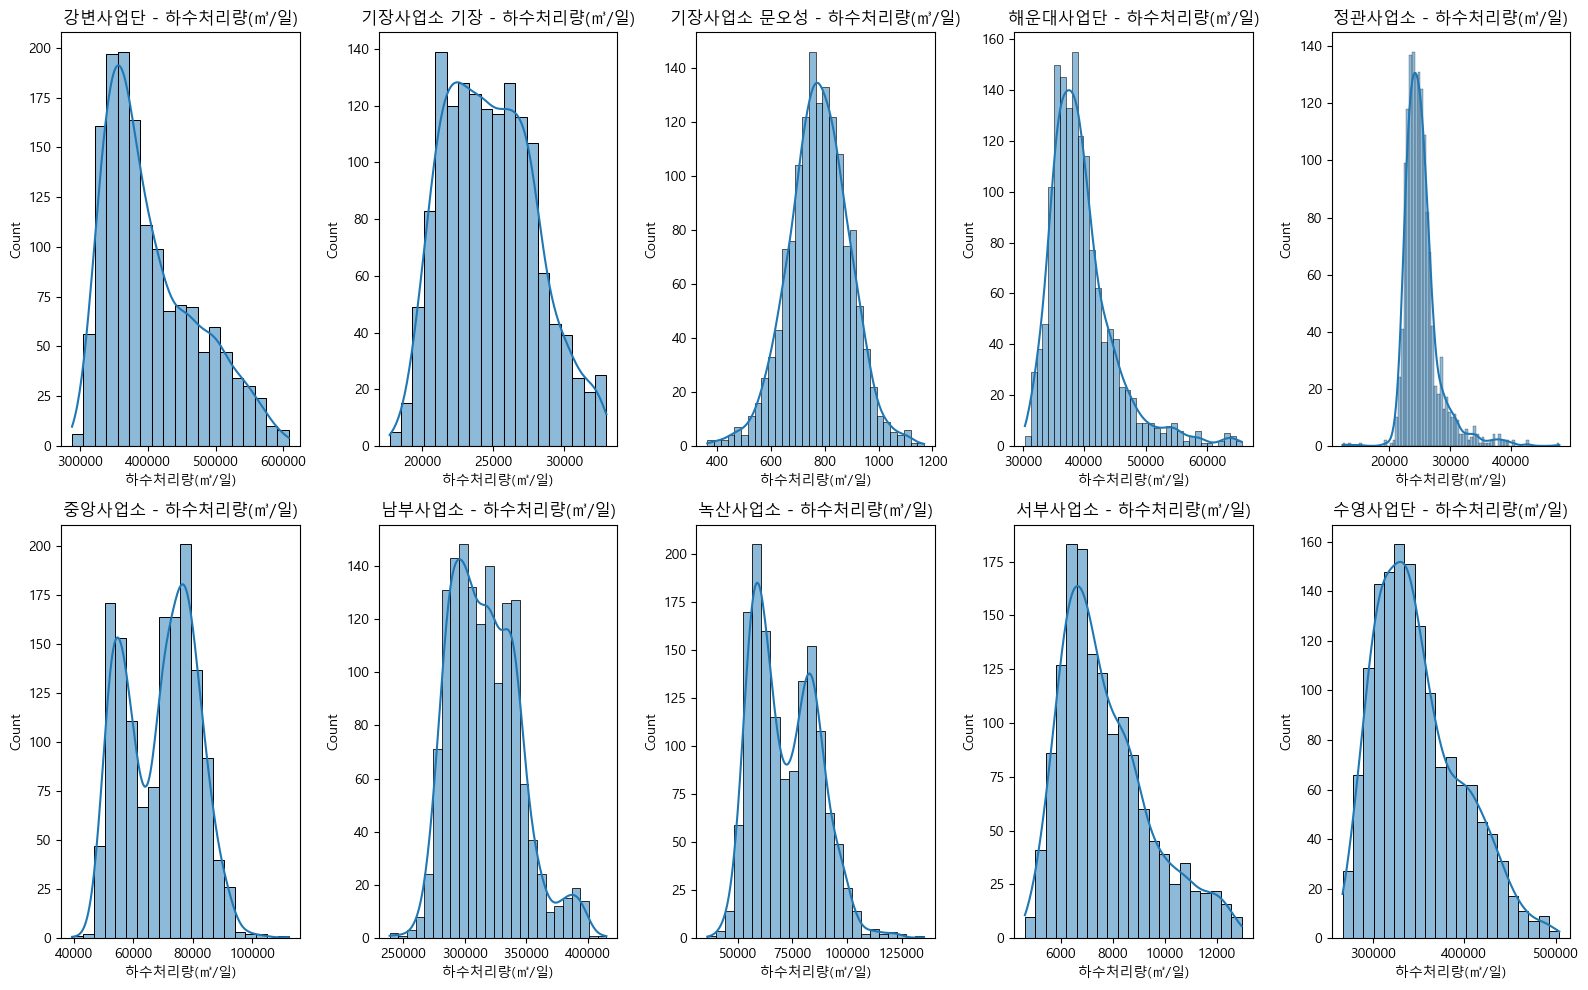

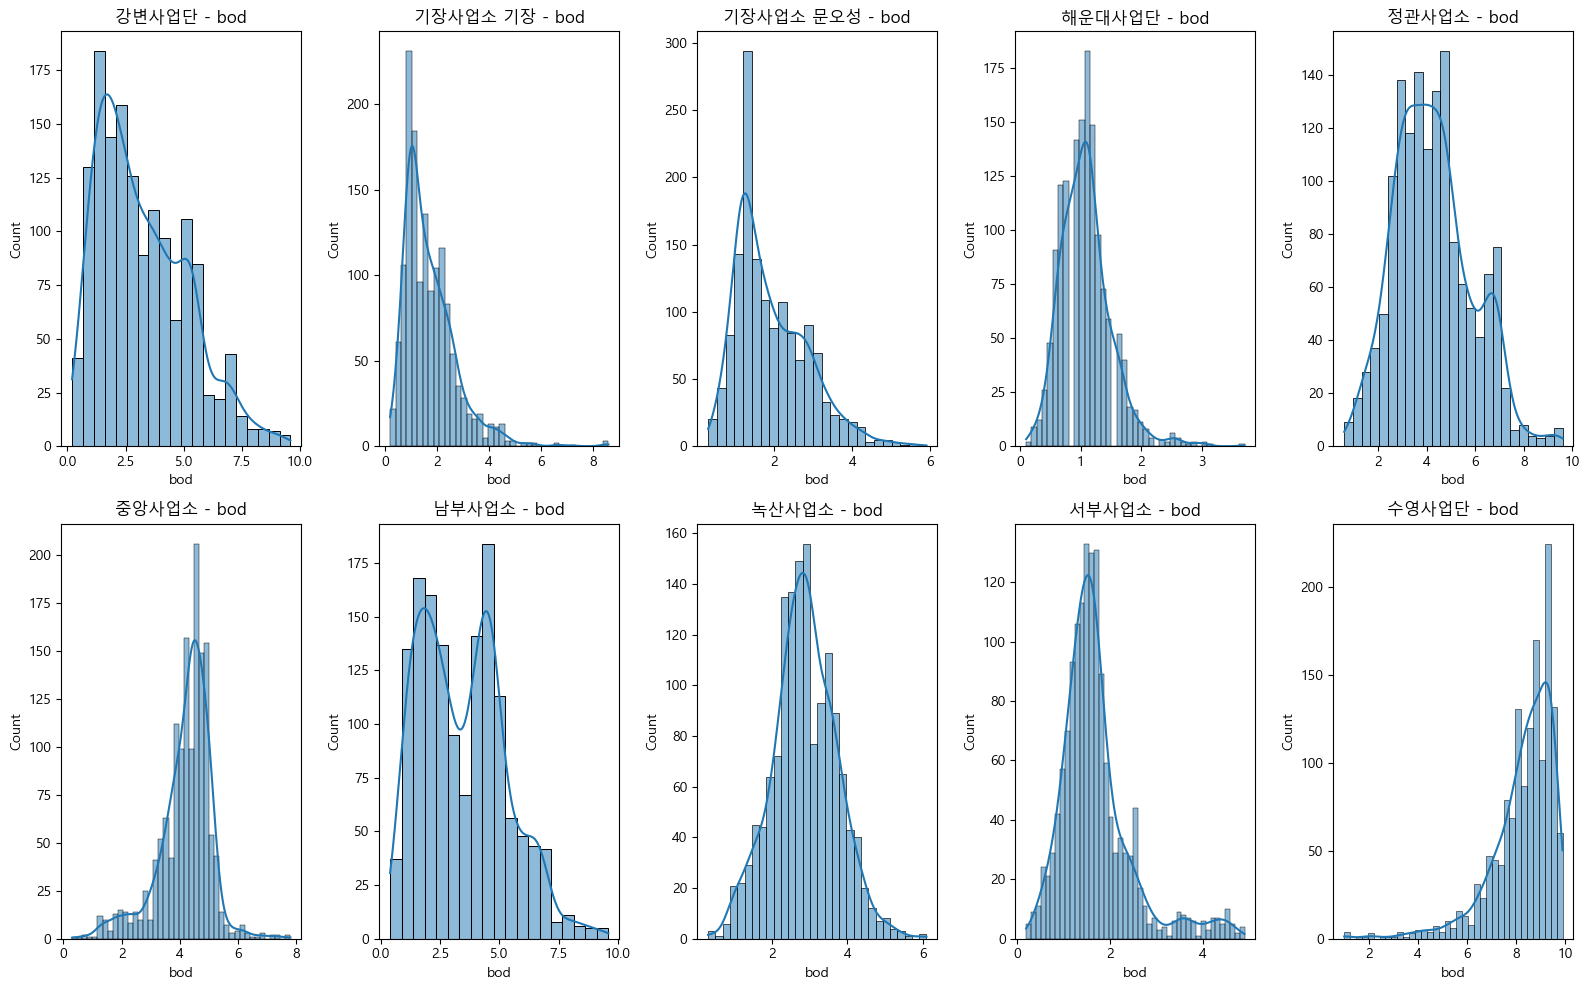

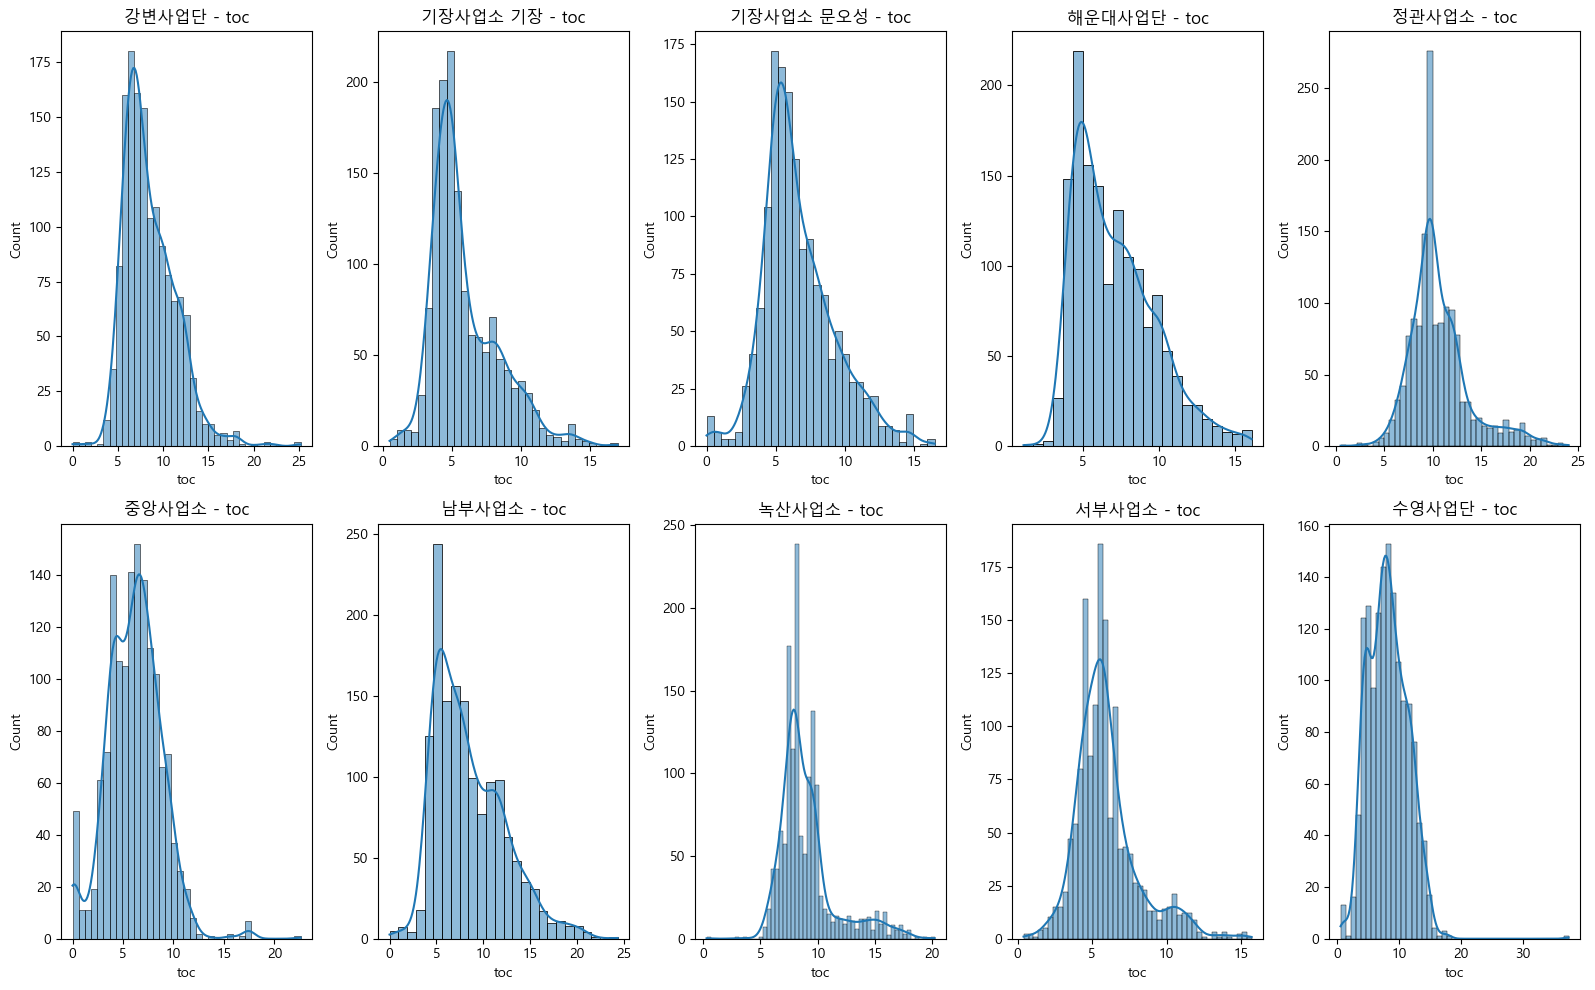

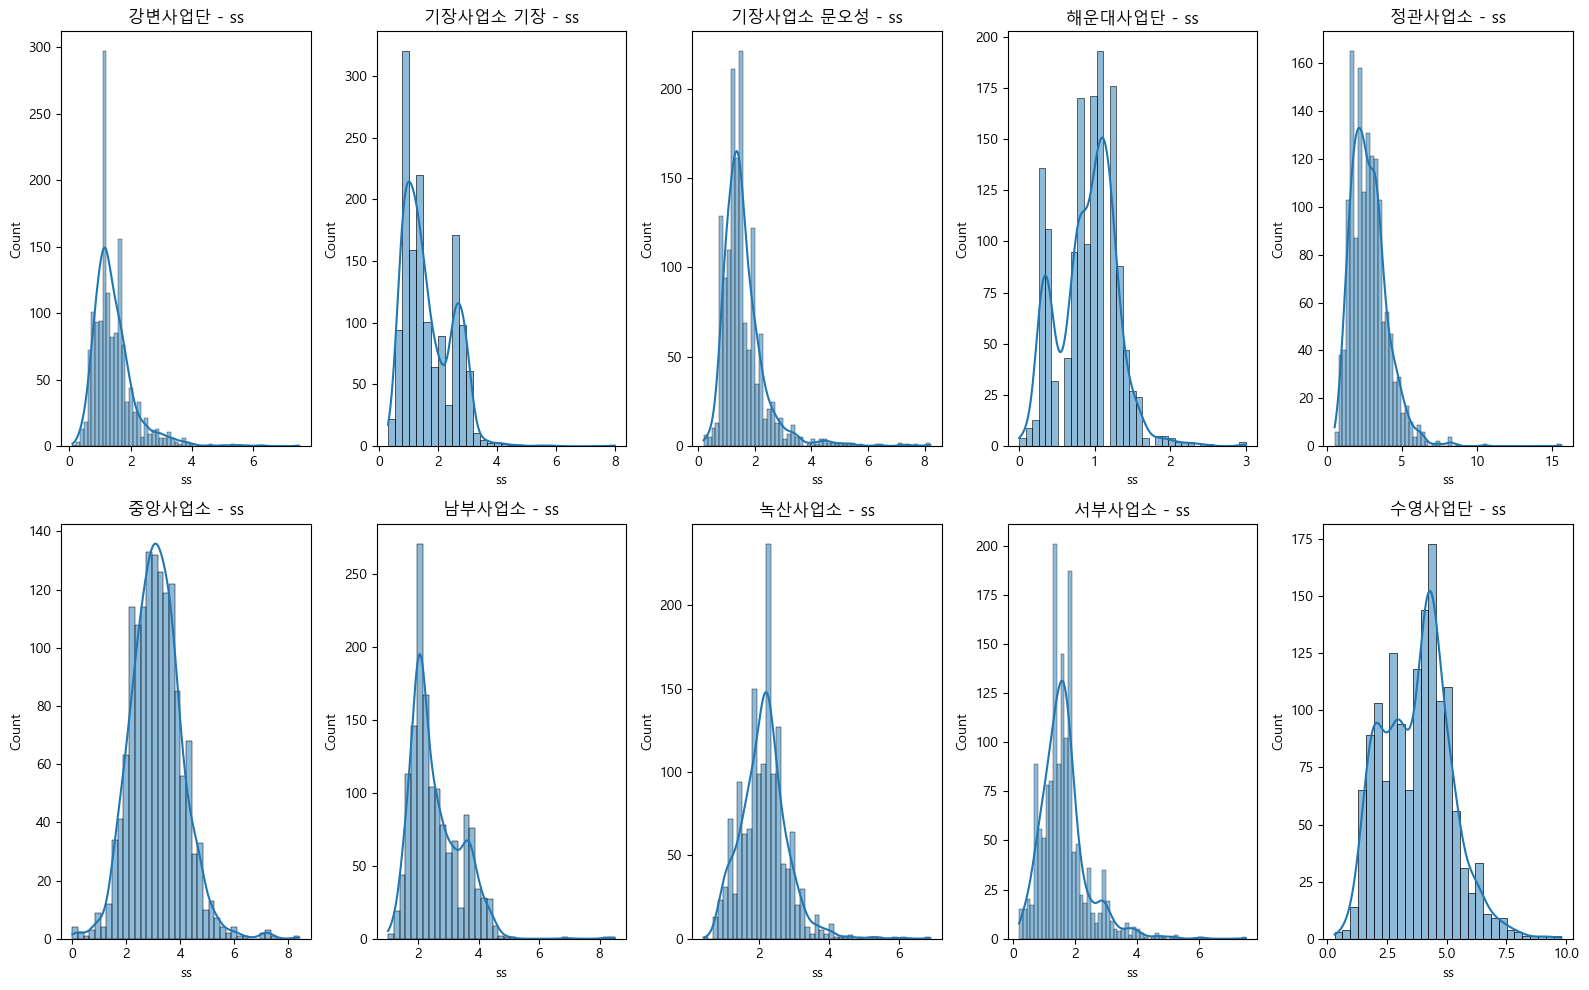

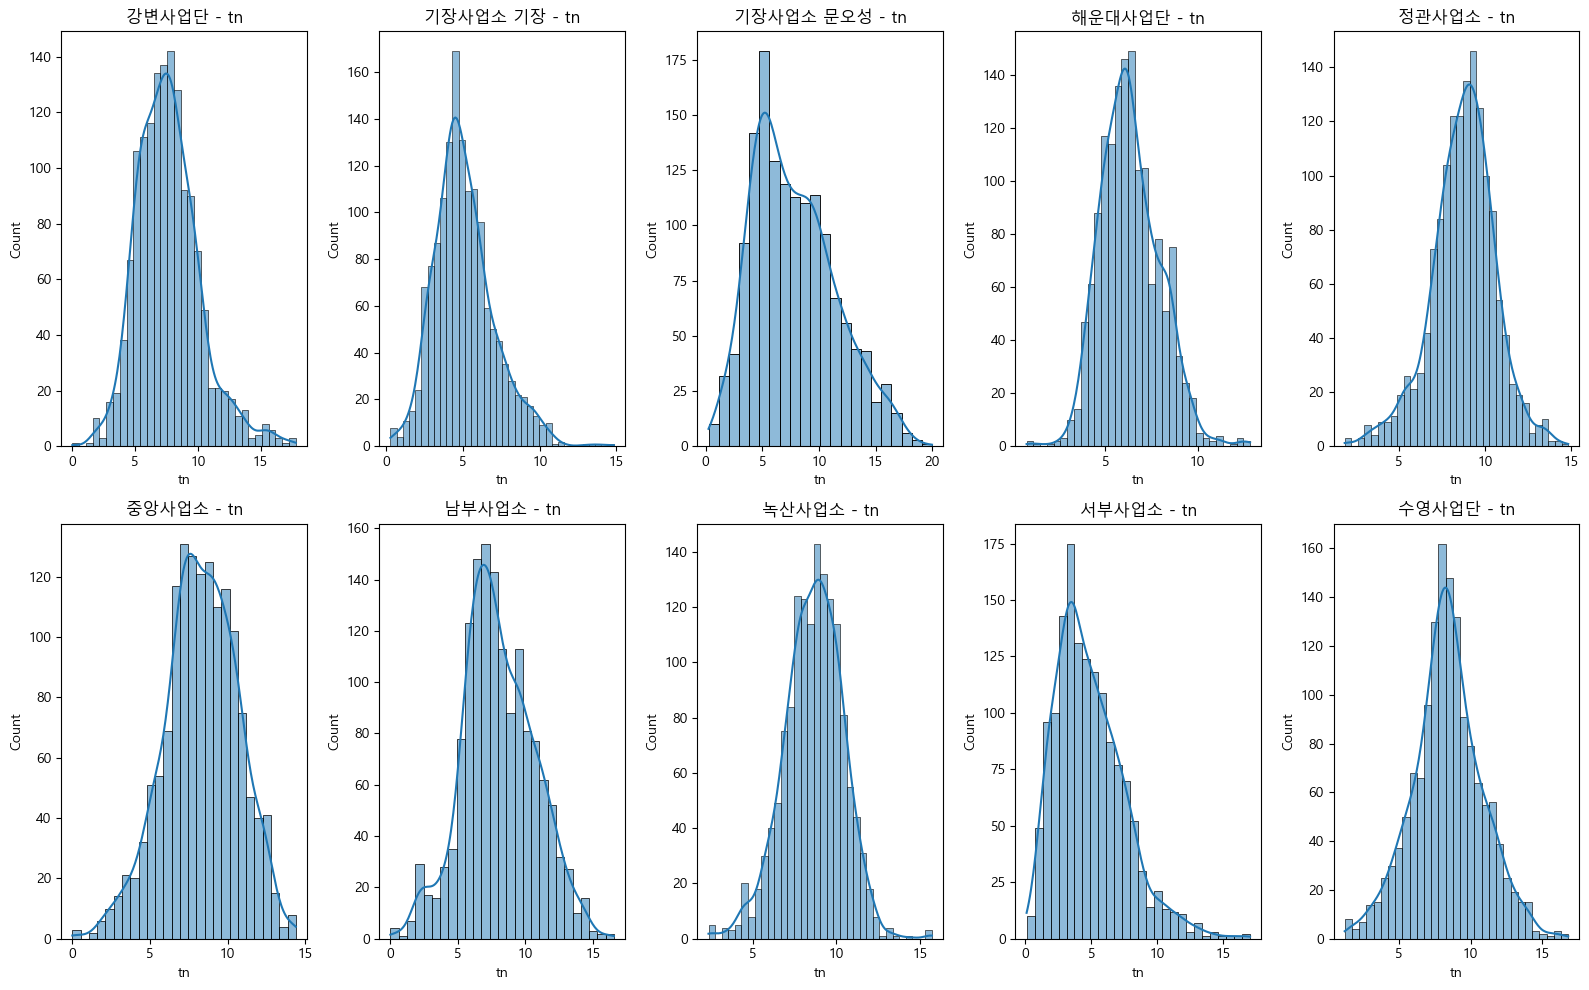

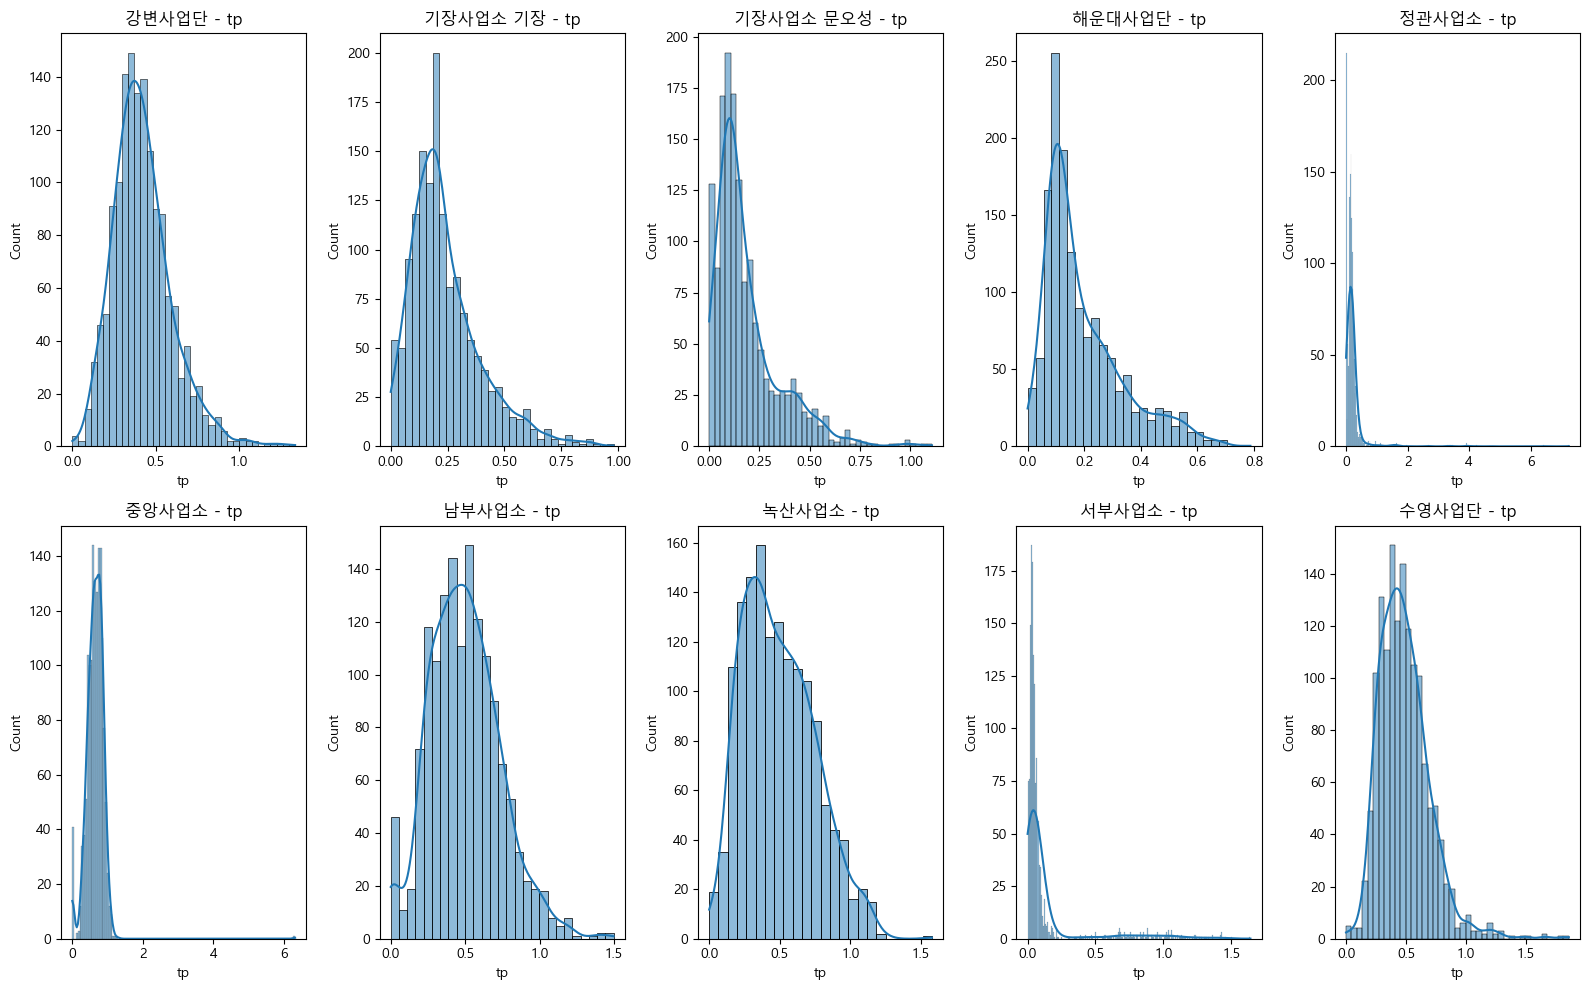

In [12]:
# 각 항목 분포 확인 (사업단별)
cols = ['하수처리량(㎥/일)', 'bod', 'toc', 'ss', 'tn', 'tp']
사업단_list = df['사업단'].unique()

for col in cols:
    plt.figure(figsize=(16, 10))
    for i, 사업단 in enumerate(사업단_list):
        plt.subplot(2, 5, i+1)  # 10개니까 2행 5열
        sns.histplot(data=df[df['사업단'] == 사업단], x=col, kde=True)
        plt.title(f'{사업단} - {col}')
    plt.tight_layout()
    plt.show()

In [13]:
# 월 단위 컬럼 가가
df['연월'] = df['날짜'].dt.to_period('M')

In [14]:
# 사업단 + 연월별 평균 계산
cols = ['하수처리량(㎥/일)', 'bod', 'toc', 'ss', 'tn', 'tp']
monthly_avg = df.groupby(['사업단', '연월'])[cols].mean().reset_index()
# 연월 다시 시계열로 변환
monthly_avg['연월'] = monthly_avg['연월'].dt.to_timestamp()

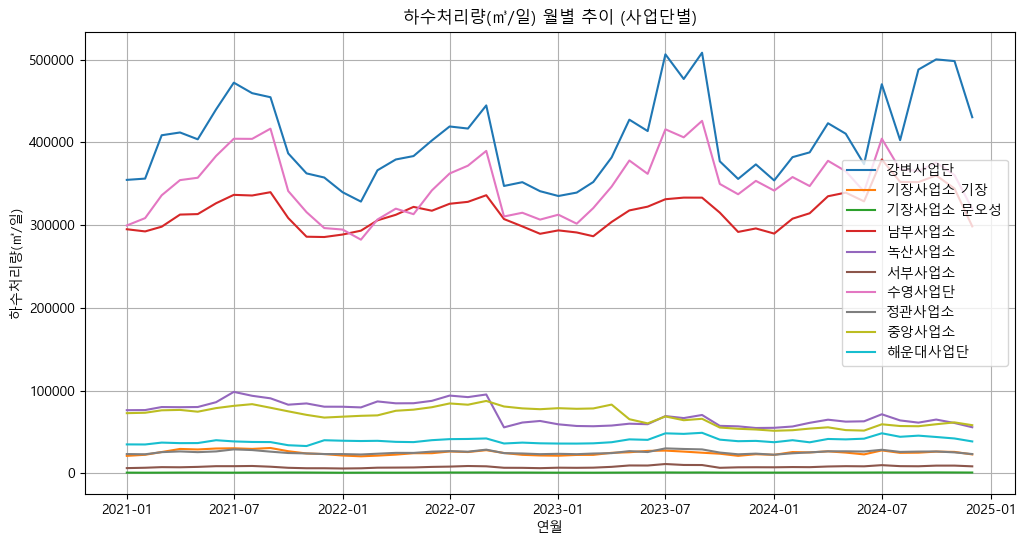

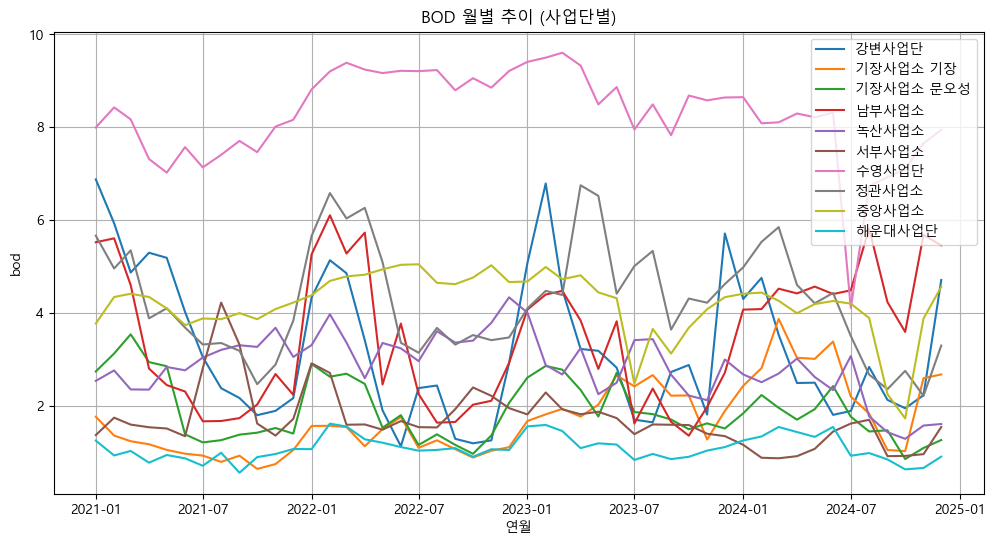

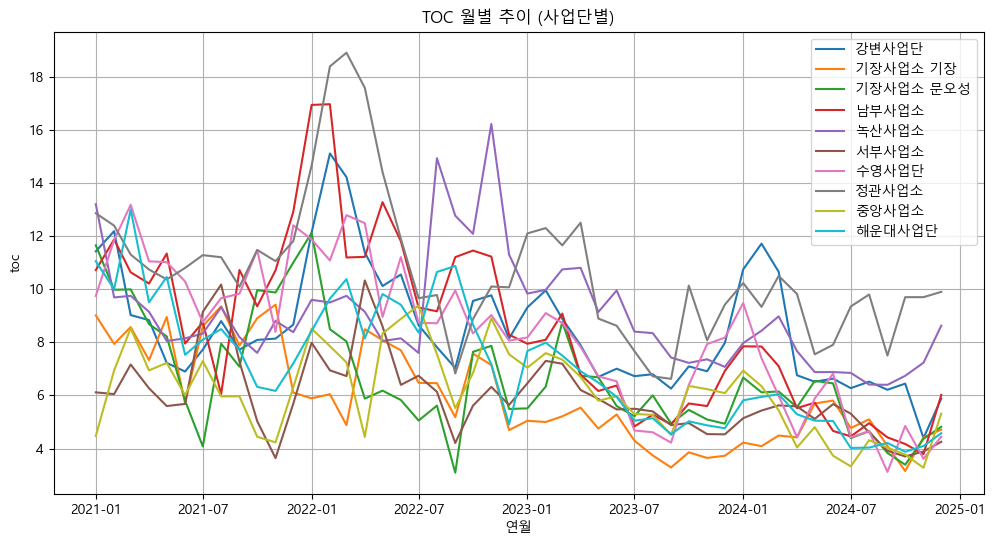

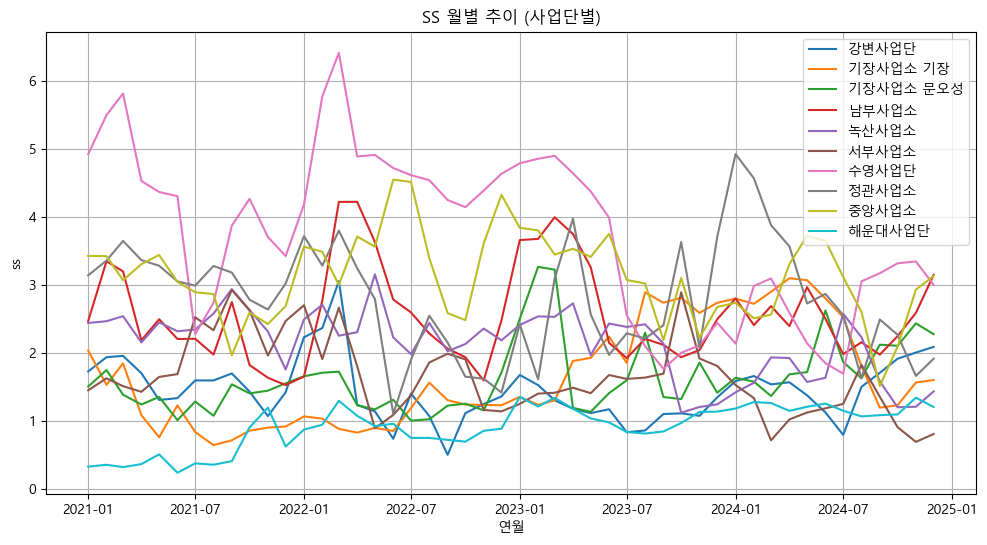

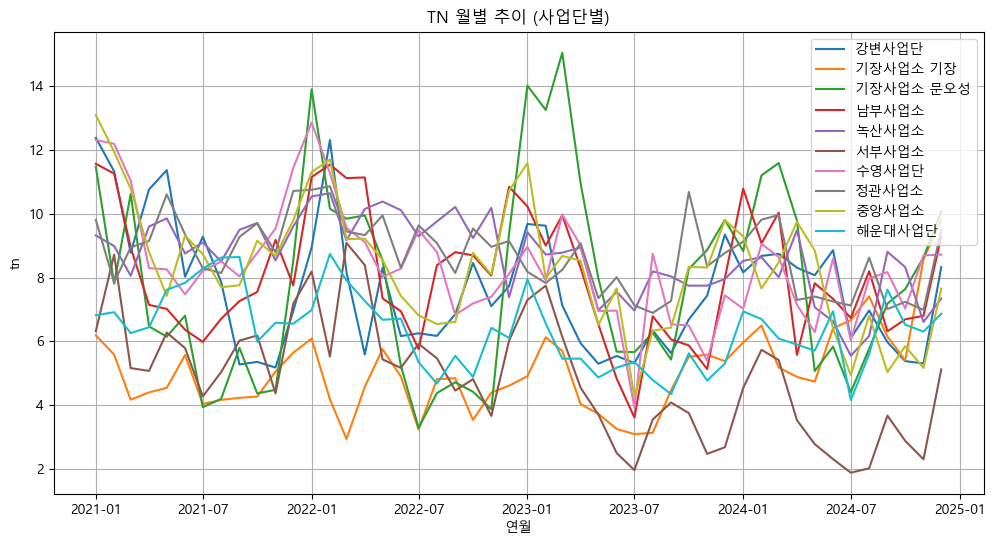

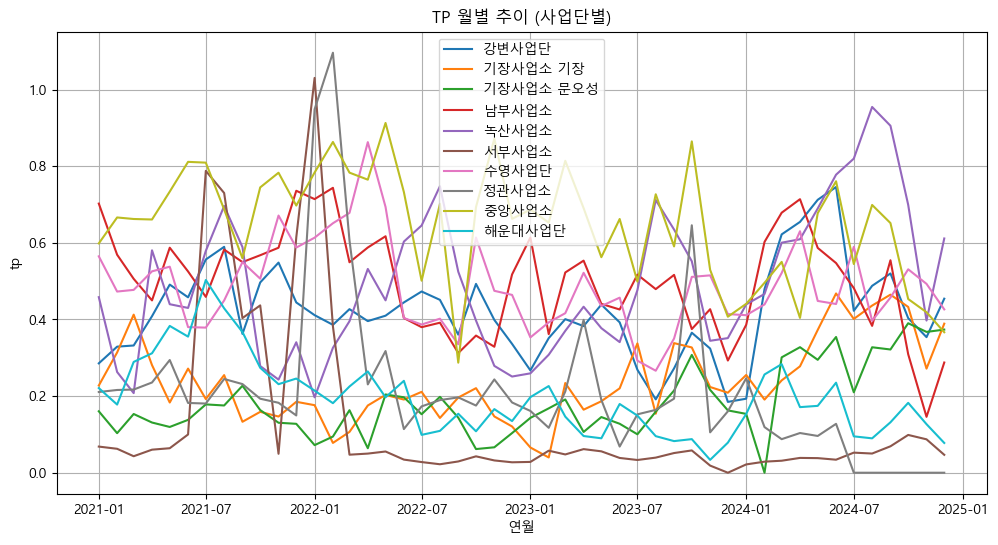

In [15]:
#사업단별 시계열 그래프 - 계절성/추세성 파악
사업단목록 = monthly_avg['사업단'].unique()

for col in cols:
    plt.figure(figsize=(12, 6))
    for site in 사업단목록:
        data = monthly_avg[monthly_avg['사업단'] == site]
        plt.plot(data['연월'], data[col], label=site)

    plt.title(f'{col.upper()} 월별 추이 (사업단별)')
    plt.xlabel('연월')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

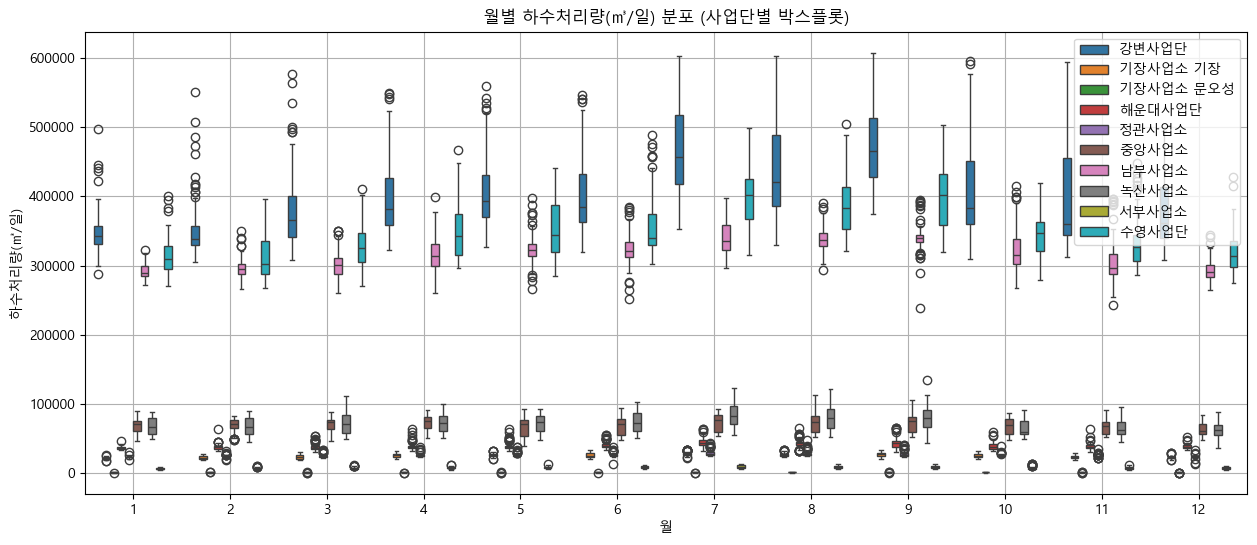

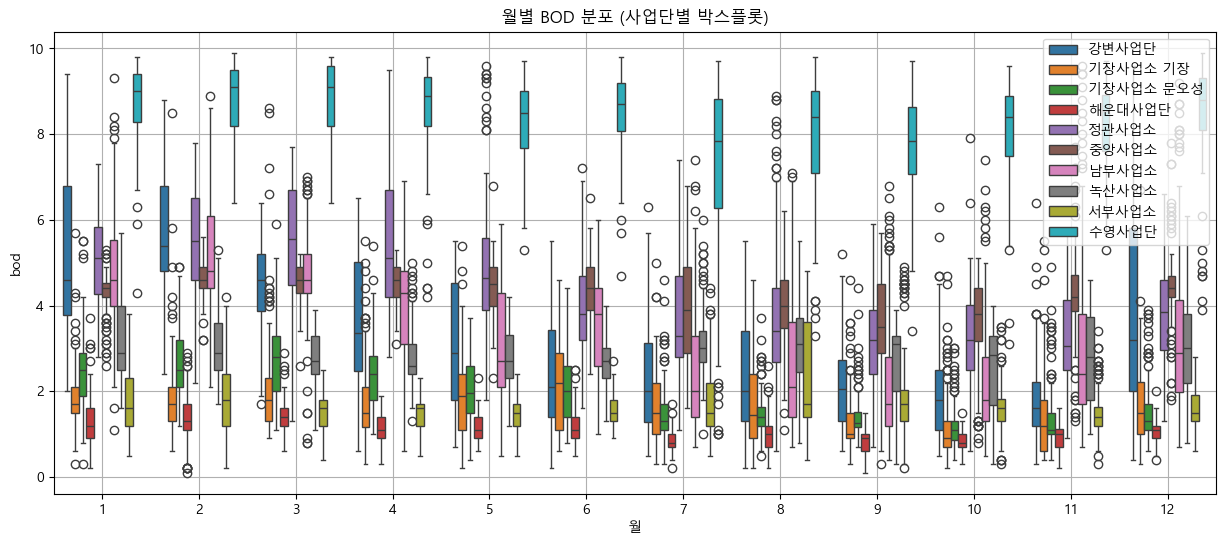

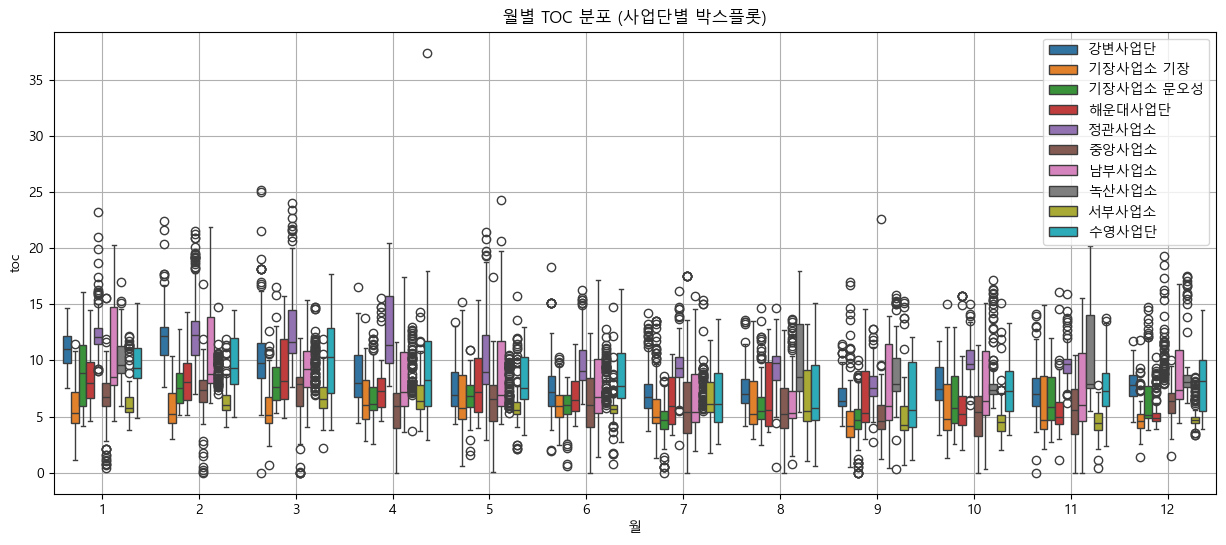

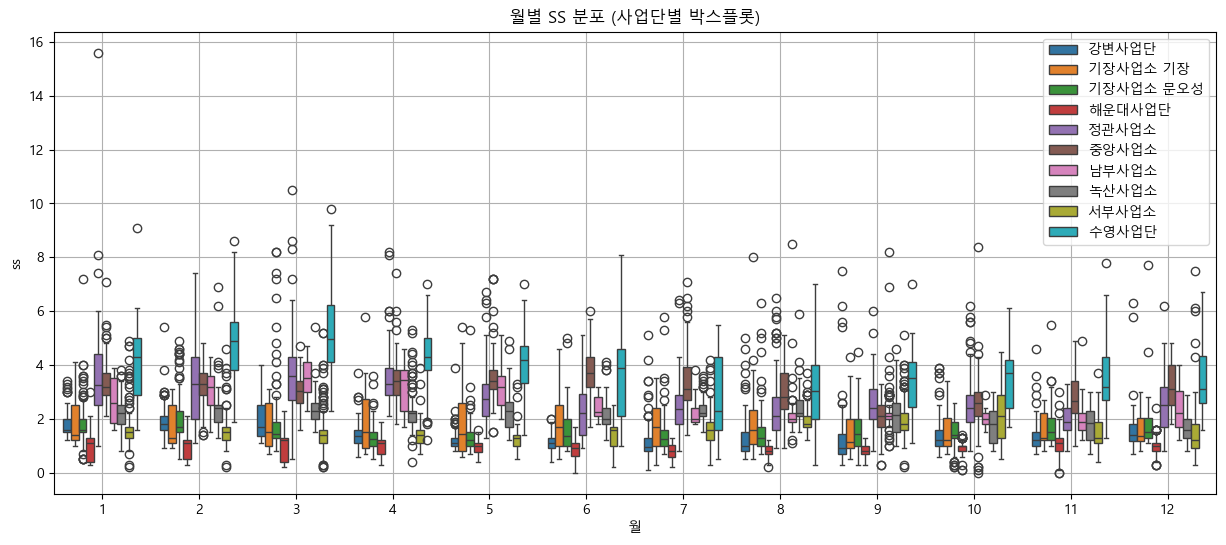

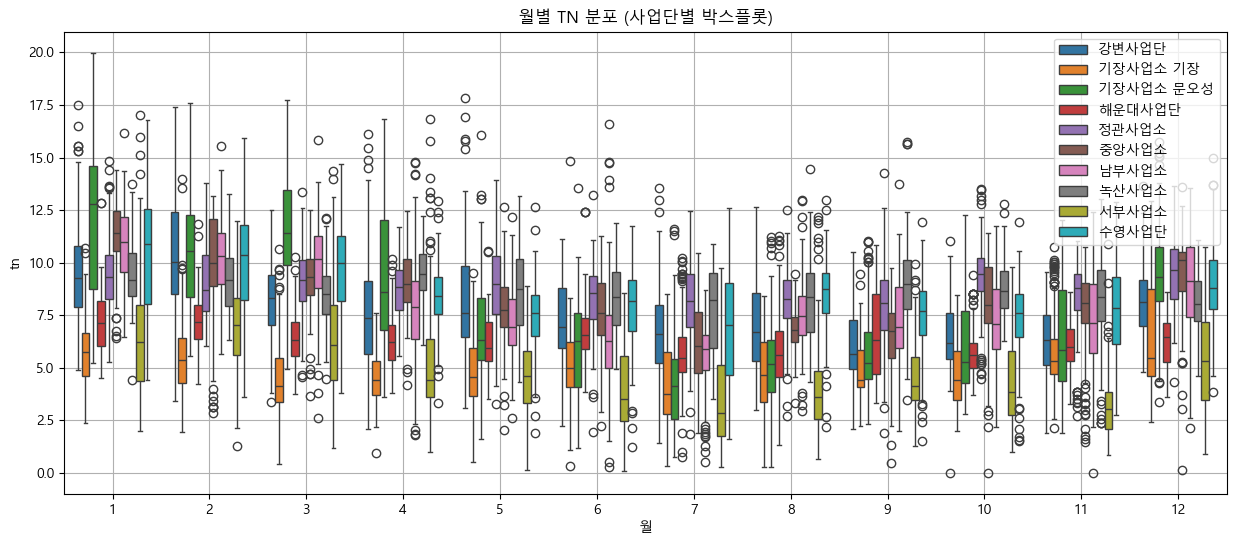

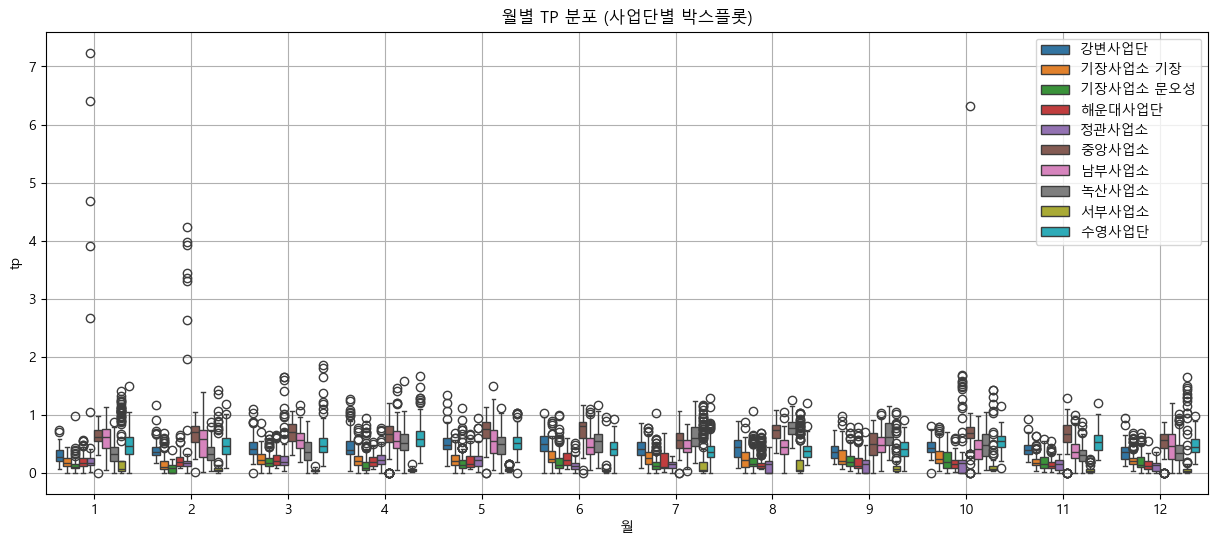

In [16]:
# box plot(이상값 탐지)
cols = ['하수처리량(㎥/일)','bod', 'toc', 'ss', 'tn', 'tp']

for col in cols:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x='월', y=col, hue='사업단')
    plt.title(f'월별 {col.upper()} 분포 (사업단별 박스플롯)')
    plt.xlabel('월')
    plt.ylabel(col)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

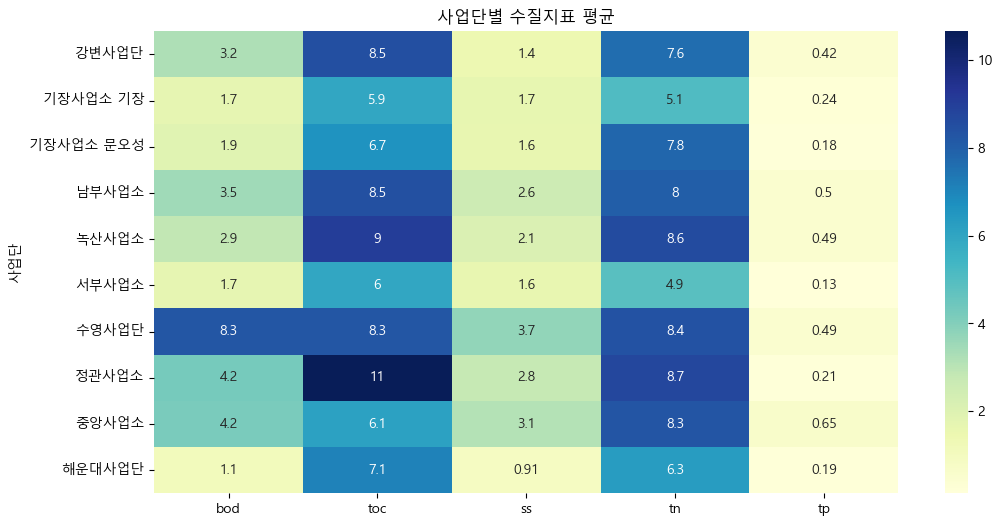

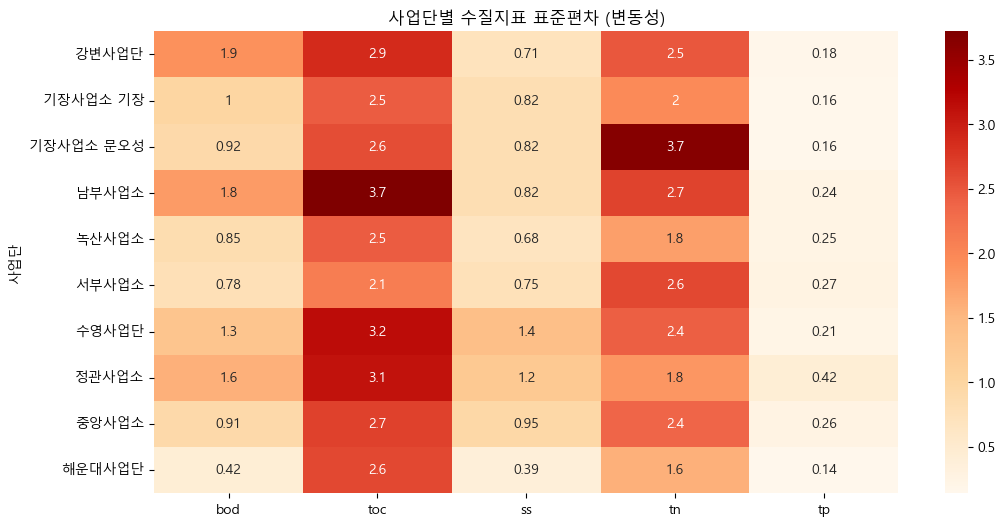

In [17]:
# Heatmap(사업단별 평균과 표준편차 요약)
cols = ['bod', 'toc', 'ss', 'tn', 'tp']
mean_df = df.groupby('사업단')[cols].mean().round(2)
std_df = df.groupby('사업단')[cols].std().round(2)

plt.figure(figsize=(12, 6))
sns.heatmap(mean_df, annot=True, cmap='YlGnBu')
plt.title("사업단별 수질지표 평균")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(std_df, annot=True, cmap='OrRd')
plt.title("사업단별 수질지표 표준편차 (변동성)")
plt.show()

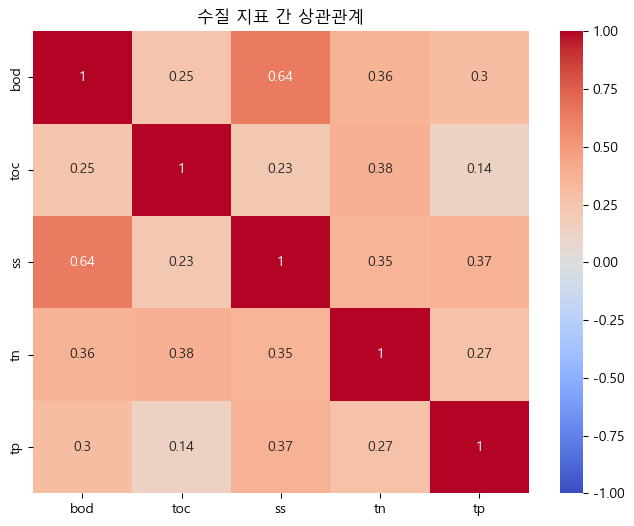

In [18]:
# Heatmap(수질 지표 간 상관관계 분석)
cols = ['bod', 'toc', 'ss', 'tn', 'tp']
corr_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("수질 지표 간 상관관계")
plt.show()

◆ 우선 개선 필요 사업단 TOP 5
  • 수영사업단: 평균점수 0.161  (전체 평균 대비 4.4배)  → 개입 우선 추천
  • 정관사업소: 평균점수 0.046  (전체 평균 대비 1.3배)  → 개입 우선 추천
  • 남부사업소: 평균점수 0.032  (전체 평균 대비 0.9배)  → 개입 우선 추천
  • 강변사업단: 평균점수 0.031  (전체 평균 대비 0.8배)  → 개입 우선 추천
  • 기장사업소 문오성: 평균점수 0.023  (전체 평균 대비 0.6배)  → 개입 우선 추천

=== 적용 가중치(entropy) ===
이상치빈도: 0.349
지표std합: 0.028
급변점수: 0.028
동시다지표빈도: 0.595


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41456\2350443076.py:87: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(monthly_metrics)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41456\2350443076.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rdf, x='평균점수', y='사업단', palette='Reds_r')


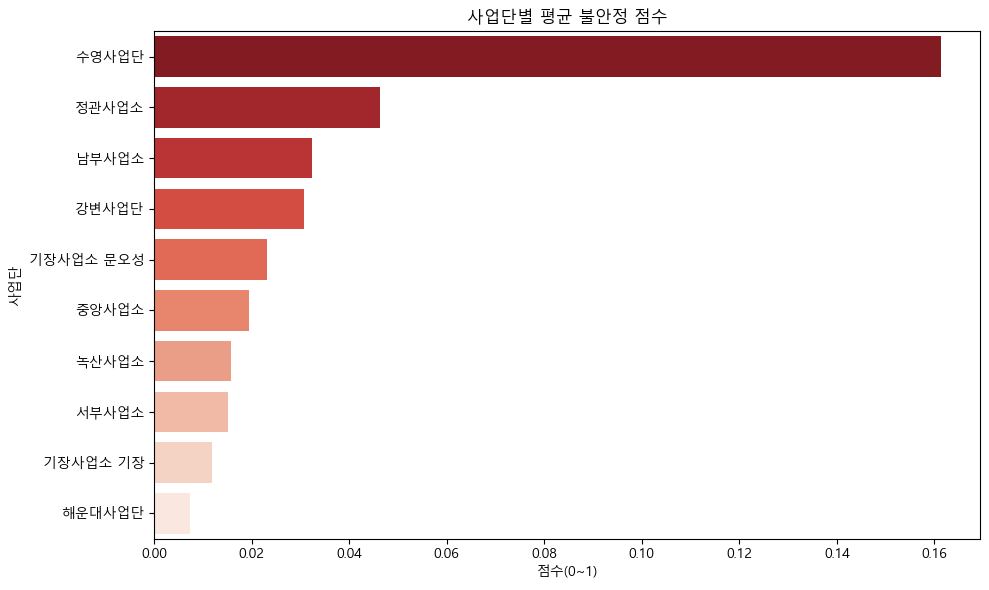

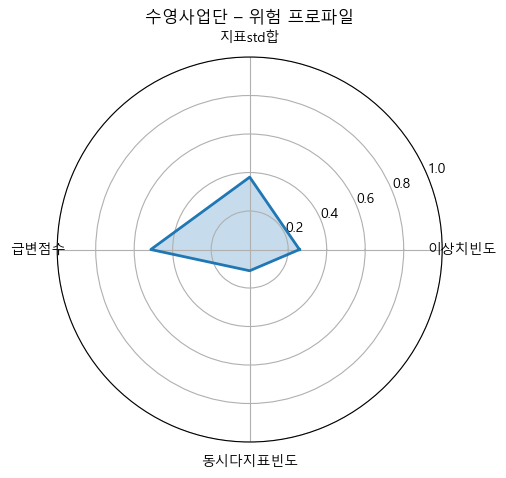

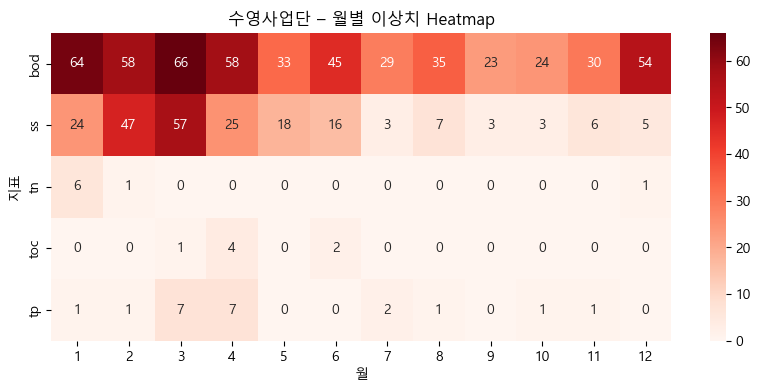

In [24]:
# =============================================================
# “수질 변화 이상 탐지 기반, 시설 운영 안정성 진단” 통합 파이프라인
# -------------------------------------------------------------
# ① 데이터 로드
# ② 이상치 플래그(IQR·Z-score·상위 p% 중 선택)
# ③ 사업단-월 단위 핵심 지표 4종 계산
# ④ 가중치(equ﻿al / variance / entropy) 자동 산출
# ⑤ 불안정 점수 + 처리량 보정 + 랭킹
# ⑥(선택) 시각화 함수 3종 준비
# =============================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore

# ─────────────────────────────
# 0. 환경 설정
# ─────────────────────────────
CSV_PATH   = '부산환경공단 일별 방류수 수질정보.csv'  # 데이터 경로
INDICATORS = ['bod', 'toc', 'ss', 'tn', 'tp']                # 분석 대상 지표
OUT_METHOD = 'iqr'      # 'iqr' | 'z' | 'pct'
PCT        = 0.99       # OUT_METHOD = 'pct' 일 때 상·하위 p%
WEIGHT_MODE = 'entropy' # 'equal' | 'variance' | 'entropy'
TOP_N      = 5          # 우선 개선 대상 개수

plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows; Mac은 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ─────────────────────────────
# 1. 데이터 로드 & 파생
# ─────────────────────────────
df = pd.read_csv(CSV_PATH, encoding='utf-8', parse_dates=['날짜'])
df['연도'] = df['날짜'].dt.year
df['월']  = df['날짜'].dt.month
df['사업단-월'] = df['사업단'] + '_' + df['날짜'].dt.to_period('M').astype(str)

# ─────────────────────────────
# 2. 이상치 플래그 함수
# ─────────────────────────────
def detect_outliers_iqr(s):
    q1, q3 = s.quantile([.25, .75]); iqr = q3 - q1
    return (s < q1 - 1.5*iqr) | (s > q3 + 1.5*iqr)

def detect_outliers_z(s):
    z = zscore(s.dropna()); out = np.full(s.shape, False)
    out[s.notna()] = np.abs(z) > 3; return out

def detect_outliers_pct(s, pct=.99):
    lo, hi = s.quantile([1-pct, pct]); return (s < lo) | (s > hi)

def add_outlier_flags(dfi):
    res = dfi.copy()
    for c in INDICATORS:
        if OUT_METHOD == 'iqr':
            res[f'{c}_out'] = detect_outliers_iqr(res[c])
        elif OUT_METHOD == 'z':
            res[f'{c}_out'] = detect_outliers_z(res[c])
        else:
            res[f'{c}_out'] = detect_outliers_pct(res[c], PCT)
    return res

df_flag = add_outlier_flags(df)
out_cols = [c for c in df_flag.columns if c.endswith('_out')]
df_flag['multi_out'] = df_flag[out_cols].sum(axis=1)

# ─────────────────────────────
# 3. 사업단-월 핵심 지표 계산
# ─────────────────────────────
def monthly_metrics(g):
    g = g.sort_values('날짜')                              # diff() 정확성 확보
    이상치빈도     = g[out_cols].to_numpy().sum()          # 지표×일 기준 이상치 총합
    지표std합      = g[INDICATORS].std().sum()
    급변점수       = np.abs(g[INDICATORS].diff()).mean().sum()
    동시다지표빈도 = (g['multi_out'] >= 2).sum()
    처리량평균     = g['하수처리량(㎥/일)'].mean()

    return pd.Series({
        '이상치빈도'    : 이상치빈도,
        '지표std합'     : 지표std합,
        '급변점수'      : 급변점수,
        '동시다지표빈도': 동시다지표빈도,
        '처리량평균'    : 처리량평균
    })

monthly = (
    df_flag
    .groupby(['사업단', '연도', '월'])
    .apply(monthly_metrics)
    .reset_index()
)

# ─────────────────────────────
# 4. 가중치 산출 + 점수 계산
# ─────────────────────────────
metrics = ['이상치빈도', '지표std합', '급변점수', '동시다지표빈도']

# 4-1 정규화(0~1)
for col in metrics:
    monthly[f'{col}_norm'] = (monthly[col]-monthly[col].min())/(monthly[col].max()-monthly[col].min())

# 4-2 가중치 함수
def compute_weights(df_norm, cols, mode):
    if mode == 'equal':
        return {c: 1/len(cols) for c in cols}
    if mode == 'variance':
        var = {c: df_norm[c].var() for c in cols}
        tot = sum(var.values()); return {c: var[c]/tot for c in cols}
    if mode == 'entropy':
        X = df_norm[[c for c in cols]].values
        X = np.where(X == 0, 1e-12, X)               # log(0) 회피
        p = X / X.sum(axis=0, keepdims=True)
        e = - (p * np.log(p)).sum(axis=0) / np.log(len(df_norm))
        d = 1 - e
        return {c: d[i]/d.sum() for i, c in enumerate(cols)}
    raise ValueError("mode must be 'equal', 'variance', or 'entropy'")

w = compute_weights(monthly[[f'{c}_norm' for c in metrics]], [f'{c}_norm' for c in metrics], WEIGHT_MODE)

# 4-3 불안정 점수 (가중 합)
monthly['불안정점수'] = sum(monthly[f'{c}_norm'] * w[f'{c}_norm'] for c in metrics)

# 4-4 처리량 보정(영향도 반영·선택)
proc_norm = (monthly['처리량평균']-monthly['처리량평균'].min())/(monthly['처리량평균'].max()-monthly['처리량평균'].min())
monthly['점수최종'] = monthly['불안정점수']*0.7 + proc_norm*monthly['불안정점수']*0.3

# ─────────────────────────────
# 5. 사업단 랭킹 & 리포트
# ─────────────────────────────
ranked = (
    monthly.groupby('사업단')
           .agg(평균점수=('점수최종','mean'))
           .sort_values('평균점수', ascending=False)
           .reset_index()
)

top_targets = ranked.head(TOP_N)

print("◆ 우선 개선 필요 사업단 TOP", TOP_N)
for _, r in top_targets.iterrows():
    mult = r['평균점수']/ranked['평균점수'].mean()
    print(f"  • {r['사업단']}: 평균점수 {r['평균점수']:.3f}  (전체 평균 대비 {mult:.1f}배)  → 개입 우선 추천")

print("\n=== 적용 가중치({}) ===".format(WEIGHT_MODE))
for k, v in w.items():
    print(f"{k.replace('_norm','')}: {v:.3f}")

# ─────────────────────────────
# 6. 시각화 함수(필요 시 호출)
# ─────────────────────────────
def barplot_scores(rdf):
    plt.figure(figsize=(10,6))
    sns.barplot(data=rdf, x='평균점수', y='사업단', palette='Reds_r')
    plt.title('사업단별 평균 불안정 점수')
    plt.xlabel('점수(0~1)')
    plt.ylabel('사업단')
    plt.tight_layout(); plt.show()

def radar_chart(rdf, plant):
    labels = metrics
    stats  = [rdf.loc[rdf['사업단']==plant, f'{c}_norm'].mean() for c in labels]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    stats += stats[:1]; angles += angles[:1]

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, linewidth=2); ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f'{plant} – 위험 프로파일'); ax.set_ylim(0,1)
    plt.show()

def heatmap_outliers(df_flagged, plant):
    melt = (df_flagged.melt(id_vars=['사업단','월'], value_vars=out_cols,
                             var_name='지표', value_name='is_out')
                    .assign(지표=lambda d: d['지표'].str.replace('_out','')))
    hpiv = (melt[melt['사업단']==plant]
                .groupby(['지표','월'])['is_out'].sum()
                .unstack(fill_value=0))
    plt.figure(figsize=(10,4))
    sns.heatmap(hpiv, cmap='Reds', annot=True, fmt='g')
    plt.title(f'{plant} – 월별 이상치 Heatmap'); plt.ylabel('지표'); plt.xlabel('월')
    plt.show()

# 예시 호출
barplot_scores(ranked)
radar_chart(monthly, top_targets['사업단'].iloc[0])
heatmap_outliers(df_flag, top_targets['사업단'].iloc[0])
